<div style = "color: Black; display: fill;
              border-radius: 7px;
              background-color: #607EAA;
              font-size: 160%;
              font-family: Verdana">
    <p style = "padding: 15px; color: White;"><b>Context

In a nutshell, the purpose of this study is to develop a straightforward approach that can be utilized by anyone in the process of making decisions. <br>
When it comes to making important decisions in the future, merely making a list of the benefits and drawbacks of each option might not be as beneficial as the concepts that have been offered here. <br>
It does not include a complicated process for selecting the ideal place; nonetheless, it does bring out a technique to incorporate logical thinking. <br>
Having said that, I'm interested in learning whether or not I can contribute to the process of decision making that we're going through. <br>
Although the data in this instance are a little bit old, the purpose of this investigation is to establish whether or not this approach makes sense. <br>
Isn't that a rather simple task? <br>
But we'll see about it! <br>
 

<br>
<center><img src="https://i.imgur.com/gEX4RCf.png"></center>
<br>

<div style = "color: Black; display: fill;
              border-radius: 7px;
              background-color: #607EAA;
              font-size: 160%;
              font-family: Verdana">
    <p style = "padding: 15px; color: White;"><b>Table of Contents

* [1. Loading Libraries and Data](#1.-Loading-Libraries-and-Data)
  * [1.1 Install Required Packages](#1.1-Install-Required-Packages)
  * [1.2 Loading Libraries and Data](#1.2-Loading-Libraries-and-Data)
* [2. Data Exploration](#2.-Data-Exploration)
  * [2.1 The Data](#2.1-The-Data)
  * [2.2 Rooms and Properties](#2.2-Rooms-and-Properties)
  * [2.3 Accommodations](#2.3-Accommodations)
  * [2.4 Neighborhoods](#2.4-Neighborhoods)
  * [2.5 Neighbourhood Safety](#2.5-Neighbourhood-Safety)
  * [2.6 Neighbourhood Price](#2.6-Neighbourhood-Price)
  * [2.7 Review Scores X Price](#2.7-Review-Scores-X-Price)
  * [2.8 Using Review Scores](#2.8-Using-Review-Scores)

* [3. Conclusion](#3.-Conclusion)


# 1. Libraries and Data

## 1.1 Install Required Packages

In [1]:
# general required packages
# %load basic_installs.py
import sys
!{sys.executable} -m pip install geopandas
!{sys.executable} -m pip install geocoder
!{sys.executable} -m pip install geopy
!{sys.executable} -m pip install folium
!{sys.executable} -m pip install pygeoj
!{sys.executable} -m pip install pyshp
!{sys.executable} -m pip install datetime
!{sys.executable} -m pip install plotly chart-studio
!{sys.executable} -m pip install chart-studio 
!{sys.executable} -m pip install cufflinks
!{sys.executable} -m pip install --upgrade cython

## 1.2 Loading Libraries and Data

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt

import os
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

#to make the interactive maps
import folium
from folium.plugins import FastMarkerCluster
import geopandas as gpd
from branca.colormap import LinearColormap

#to make the plotly graphs
import plotly.graph_objs as go
import chart_studio.plotly as py
from plotly.offline import iplot, init_notebook_mode
import cufflinks
cufflinks.go_offline(connected=True)
init_notebook_mode(connected=True)

# 2. Data Exploration

## 2.1 The Data
The unique identifier in the dataset is the "listing" id. This is basically the id of the advertisement. You can find the dataset [here](https://www.kaggle.com/datasets/erikbruin/airbnb-amsterdam).

In [3]:
#Getting the data
listings = pd.read_csv("Data/listings.csv", index_col= "id")
listings_details = pd.read_csv("Data/listings_details.csv", index_col= "id", low_memory=False)

In [19]:
reviews_details.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,2818,1191,2009-03-30,10952,Lam,Daniel is really cool. The place was nice and ...
1,2818,1771,2009-04-24,12798,Alice,Daniel is the most amazing host! His place is ...
2,2818,1989,2009-05-03,11869,Natalja,We had such a great time in Amsterdam. Daniel ...
3,2818,2797,2009-05-18,14064,Enrique,Very professional operation. Room is very clea...
4,2818,3151,2009-05-25,17977,Sherwin,Daniel is highly recommended. He provided all...


In [4]:
print(listings.shape)

(20030, 15)


The listings file contains 15 variables per listing besides the id.

In [5]:
listings.columns

Index(['name', 'host_id', 'host_name', 'neighbourhood_group', 'neighbourhood',
       'latitude', 'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

The listings_details file contains a total of 96 variables. I am not going to use all of these, just the ones that seemed useful to me for this analysis.

In [6]:
#Join listings info
target_columns = ["property_type", "accommodates", "first_review", "review_scores_value", "review_scores_cleanliness", "review_scores_location", "review_scores_accuracy", "review_scores_communication", "review_scores_checkin", "review_scores_rating", "maximum_nights", "listing_url", "host_is_superhost", "host_about", "host_response_time", "host_response_rate", "street", "weekly_price", "monthly_price", "market"]
listings = pd.merge(listings, listings_details[target_columns], on='id', how='left')
listings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20030 entries, 2818 to 30580413
Data columns (total 35 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   name                            19992 non-null  object 
 1   host_id                         20030 non-null  int64  
 2   host_name                       20026 non-null  object 
 3   neighbourhood_group             0 non-null      float64
 4   neighbourhood                   20030 non-null  object 
 5   latitude                        20030 non-null  float64
 6   longitude                       20030 non-null  float64
 7   room_type                       20030 non-null  object 
 8   price                           20030 non-null  int64  
 9   minimum_nights                  20030 non-null  int64  
 10  number_of_reviews               20030 non-null  int64  
 11  last_review                     17624 non-null  object 
 12  reviews_per_month         

We can see that Amsterdam's neighbourhood group is meaningless because it has no non-null items. In the section below, I eliminate this variable and display the top of the dataframe I intend to use.

In [7]:
#Treating columns
listings = listings.drop(columns=['neighbourhood_group'])
listings['host_response_rate'] = pd.to_numeric(listings['host_response_rate'].str.strip('%'))

listings.head()

,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,...,maximum_nights,listing_url,host_is_superhost,host_about,host_response_time,host_response_rate,street,weekly_price,monthly_price,market
id,,,,,,,,,,,,,,,,,,,,,
2818,Quiet Garden View Room & Super Fast WiFi,3159,Daniel,Oostelijk Havengebied - Indische Buurt,52.365755,4.941419,Private room,59,3,248,...,15,https://www.airbnb.com/rooms/2818,t,"Upon arriving in Amsterdam, one can imagine as...",within an hour,100.0,"Amsterdam, North Holland, Netherlands",NaN,"$1,500.00",Amsterdam
3209,"Quiet apt near center, great view",3806,Maartje,Westerpark,52.390225,4.873924,Entire home/apt,160,4,42,...,20,https://www.airbnb.com/rooms/3209,f,I am a freelance radio producer and journalist...,within an hour,100.0,"Amsterdam, Noord-Holland, Netherlands",$543.00,"$2,000.00",Amsterdam
20168,100%Centre-Studio 1 Private Floor/Bathroom,59484,Alex,Centrum-Oost,52.365087,4.893541,Entire home/apt,80,1,233,...,1000,https://www.airbnb.com/rooms/20168,f,Secondary phone nr. + (Phone number hidden by ...,within a few hours,100.0,"Amsterdam, North Holland, Netherlands",NaN,NaN,Amsterdam
25428,Lovely apt in City Centre (Jordaan),56142,Joan,Centrum-West,52.373114,4.883668,Entire home/apt,125,14,1,...,60,https://www.airbnb.com/rooms/25428,f,"We are a retired couple who live in NYC, and h...",within a few hours,100.0,"Amsterdam, North Holland, Netherlands",$650.00,"$2,000.00",Amsterdam
27886,"Romantic, stylish B&B houseboat in canal district",97647,Flip,Centrum-West,52.386727,4.892078,Private room,150,2,171,...,730,https://www.airbnb.com/rooms/27886,t,"Marjan works in ""eye"" the dutch filmmuseum, an...",within an hour,100.0,"Amsterdam, North Holland, Netherlands",$810.00,"$2,500.00",Amsterdam


## 2.2 Rooms and Properties 
### Room types
I didn't realize this, but Amsterdam has a rule that states that entire homes or apartments can only be rented out via Airbnb for a maximum of 60 days each year. Below, we can see that the majority of the listings are subject to this restriction.

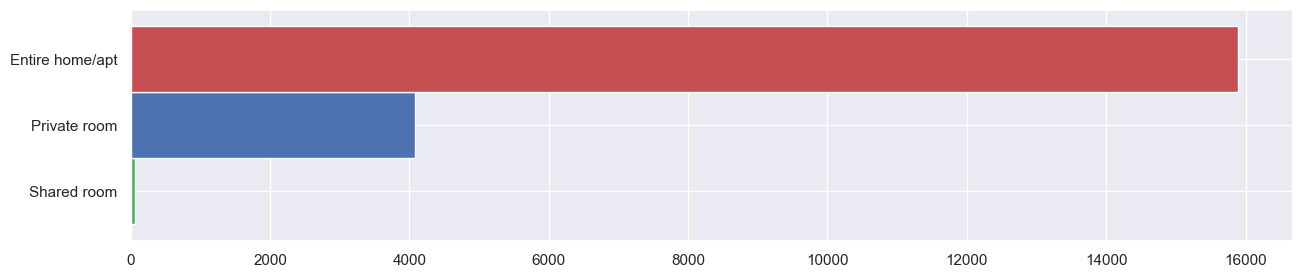

In [8]:
freq_room_type = listings['room_type']. value_counts().sort_values(ascending=True)
freq_room_type.plot.barh(figsize=(15, 3), width=1, color = ["g","b","r"])
plt.show()

### Property types
In the dataset, we have a lot of different property types.

In [9]:
listings.property_type.unique()

array(['Apartment', 'Townhouse', 'Houseboat', 'Bed and breakfast', 'Boat',
       'Guest suite', 'Loft', 'Serviced apartment', 'House',
       'Boutique hotel', 'Guesthouse', 'Other', 'Condominium', 'Chalet',
       'Nature lodge', 'Tiny house', 'Hotel', 'Villa', 'Cabin',
       'Lighthouse', 'Bungalow', 'Hostel', 'Cottage', 'Tent',
       'Earth house', 'Campsite', 'Castle', 'Camper/RV', 'Barn',
       'Casa particular (Cuba)', 'Aparthotel'], dtype=object)

However, Amsterdam has extremely few listings for several of those property kinds. I only show property kinds with at least 100 listings in the figure below. As we can see, apartments make up the vast bulk of homes in Amsterdam.

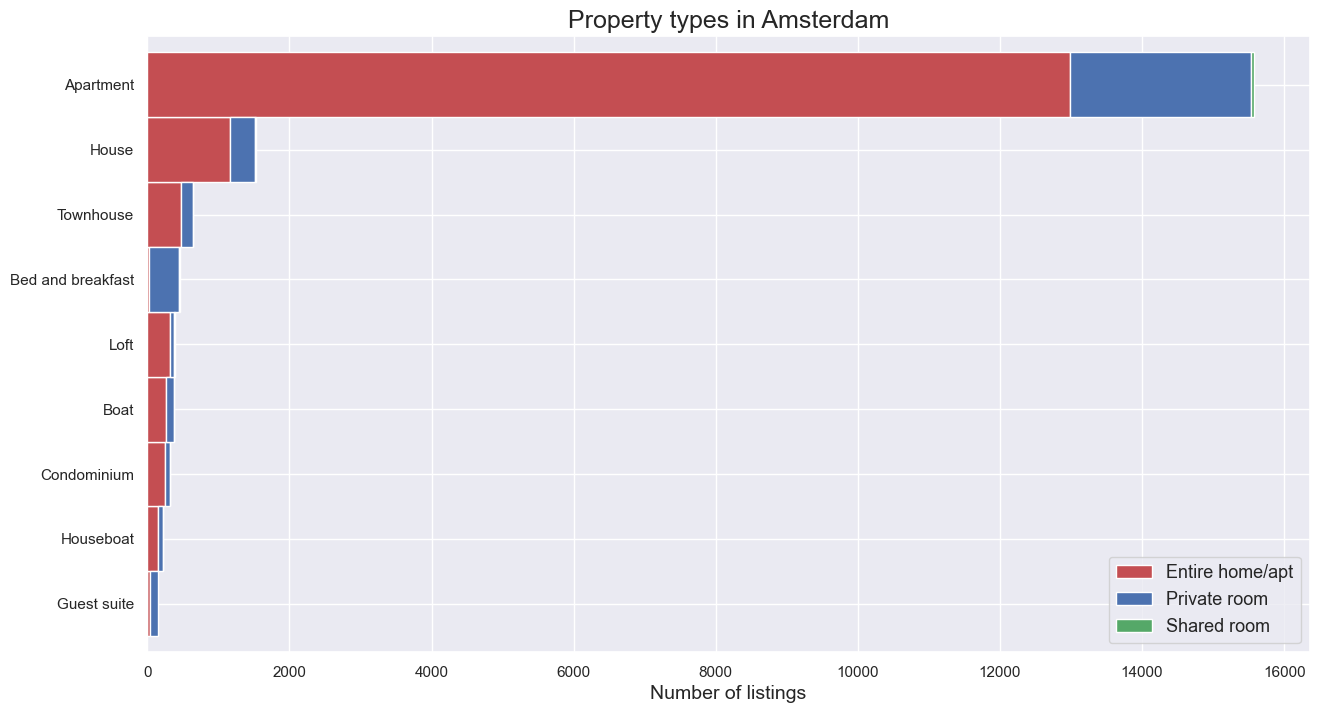

In [10]:
prop_type = listings.groupby(['property_type','room_type']).room_type.count()
prop_type = prop_type.unstack()
prop_type['total'] = prop_type.iloc[:,0:3].sum(axis = 1)
prop_type = prop_type.sort_values(by=['total'])
prop_type = prop_type[prop_type['total']>=100]
prop_type = prop_type.drop(columns=['total'])

prop_type.plot(kind='barh',stacked=True, color = ["r","b","g"],
              linewidth = 1, grid=True, figsize=(15,8), width=1)
plt.title('Property types in Amsterdam', fontsize=18)
plt.xlabel('Number of listings', fontsize=14)
plt.ylabel("")
plt.legend(loc = 4,prop = {"size" : 13})
plt.rc('ytick', labelsize=13)
plt.show()

## 2.3 Accommodations
As expected, most listings are for 2 people. In addition, Airbnb uses a maximum of 16 guests per listing.

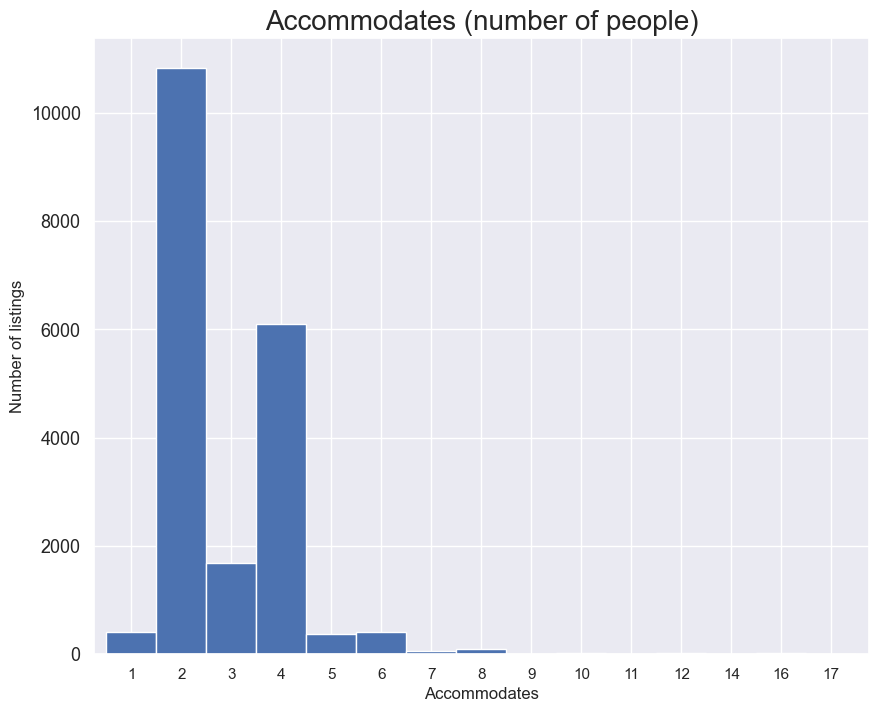

In [11]:
feq_acc=listings['accommodates'].value_counts().sort_index()
feq_acc.plot.bar(figsize=(10, 8), color='b', width=1, rot=0)
plt.title("Accommodates (number of people)", fontsize=20)
plt.ylabel('Number of listings', fontsize=12)
plt.xlabel('Accommodates', fontsize=12)
plt.show()

## 2.4 Neighborhoods
The neighborhood "De Baarsjes" has the most listings, and eight neighborhoods together have more than a thousand.

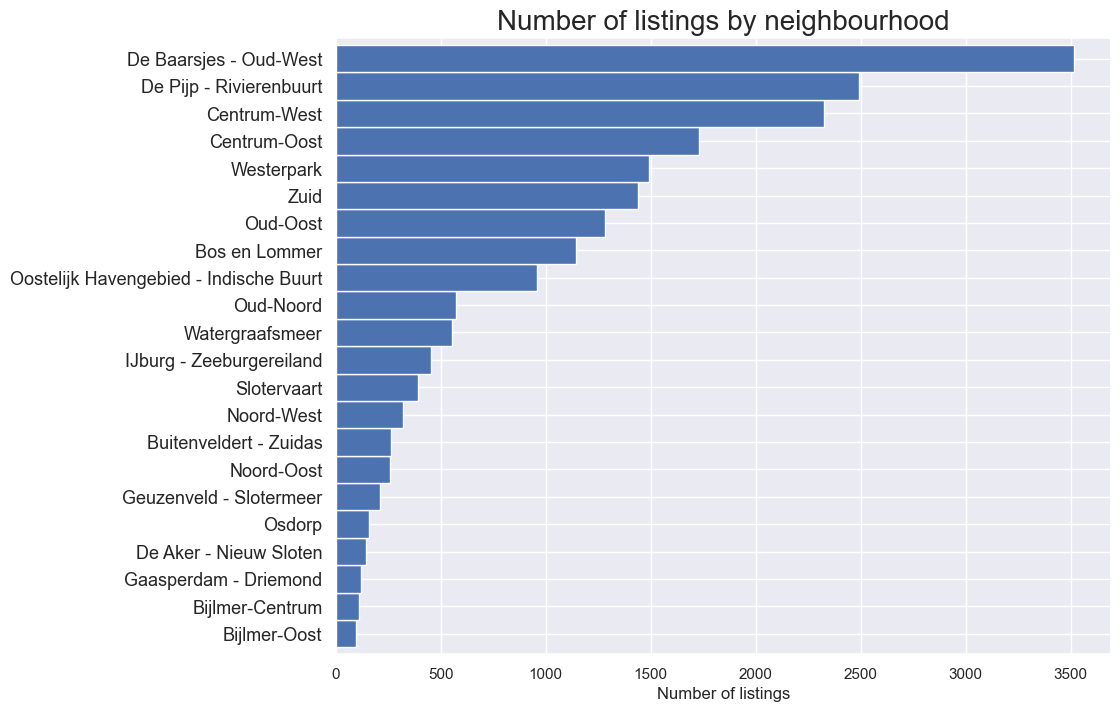

In [12]:
feq_ngh=listings['neighbourhood'].value_counts().sort_values(ascending=True)
feq_ngh.plot.barh(figsize=(10, 8), color='b', width=1)
plt.title("Number of listings by neighbourhood", fontsize=20)
plt.xlabel('Number of listings', fontsize=12)
plt.show()

See in the table below that the majority of listings are in the city center. You can zoom in on the clusters on this interactive map to finally locate the specific locations of the listings.

Note: I created a map showing the typical daily pricing per neighborhood in a later iteration (section 2.6). Although I believe the map below would be preferable at this time (because it makes use of the neighborhood shapefile), I decided to leave it as is because FastMarkerCluster appears important in the long run.

In [13]:
#Creating map to highlight the listings locations
lats2018 = listings['latitude'].tolist()
lons2018 = listings['longitude'].tolist()
locations = list(zip(lats2018, lons2018))

map1 = folium.Map(location=[52.3680, 4.9036], zoom_start=11.5)
FastMarkerCluster(data=locations).add_to(map1)
map1

## 2.5 Neighbourhood Safety
I checked up neighborhood safety online because there was no information in the Airbnb files, and I found the map below. As you can see, the western half of the city is currently the most dangerous.

<center><img src="https://i.imgur.com/7cso9GD.png" style="width: 800px;"/></center>

## 2.6 Neighbourhood Price
In order to compare "apples to apples," I only chose the most typical kind of lodging, which is lodging for two people. The costliest places to stay are in the city center, as one might anticipate.

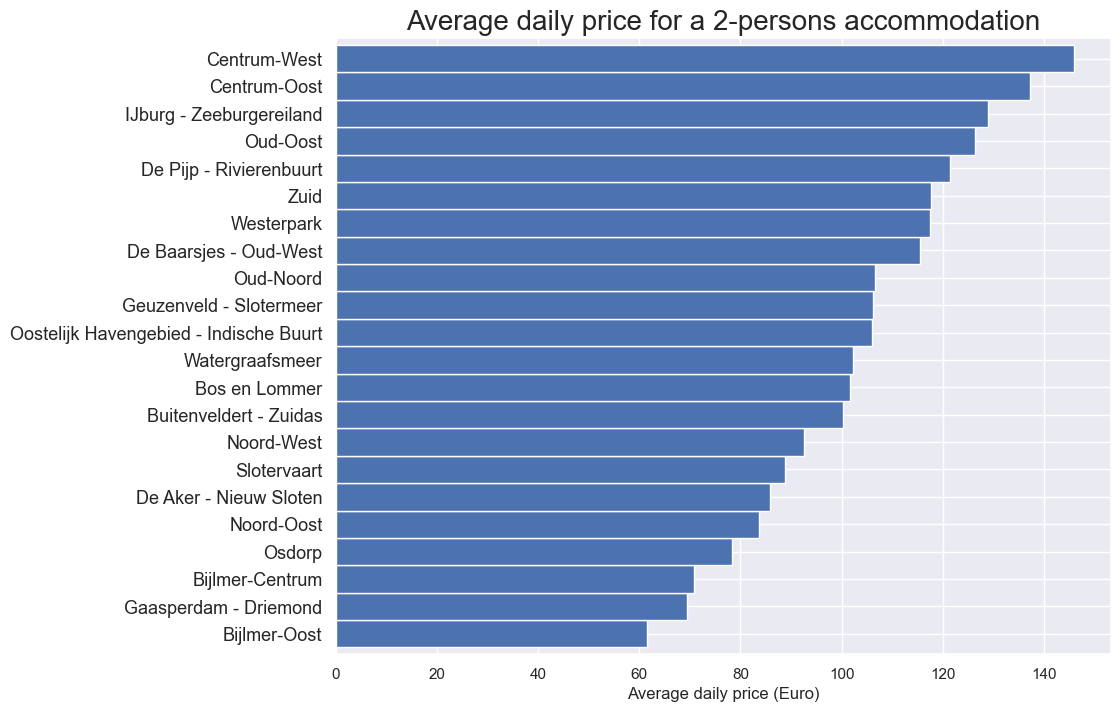

In [15]:
#Graph to show the difference in price around neighbourhood
feq_acc = listings[listings['accommodates']==2]
feq_acc = feq_acc.groupby('neighbourhood')['price'].mean().sort_values(ascending=True)
feq_acc.plot.barh(figsize=(10, 8), color='b', width=1)
plt.title("Average daily price for a 2-persons accommodation", fontsize=20)
plt.xlabel('Average daily price (Euro)', fontsize=12)
plt.ylabel("")
plt.show()

A map of the neighborhoods can be found below. This map has **interactive** features. The neighborhood name and the typical cost for rooms for two people are displayed when you hover over the polygons.

In [16]:
#Creating map to highlight the neighborhood locations
adam_ngh = gpd.read_file("Data/neighbourhoods.geojson")
feq_acc = listings[listings['accommodates']==2]
feq_acc = feq_acc.groupby('neighbourhood')['price'].mean().sort_values(ascending=True)
feq_ngh1 = pd.DataFrame([feq_acc])
feq_ngh1 = feq_ngh1.transpose()
adam = pd.merge(adam_ngh, feq_ngh1, on='neighbourhood', how='left')
# adam = pd.concat([adam_ngh, feq_ngh1])
adam.rename(columns={'price': 'average_price'}, inplace=True)
adam.average_price = adam.average_price.round(decimals=0)

map_dict = adam.set_index('neighbourhood')['average_price'].to_dict()
color_scale = LinearColormap(['yellow','red'], vmin = min(map_dict.values()), vmax = max(map_dict.values()))

def get_color(feature):
    value = map_dict.get(feature['properties']['neighbourhood'])
    return color_scale(value)

map3 = folium.Map(location=[52.3680, 4.9036], zoom_start=11)
folium.GeoJson(data=adam,
               name='Amsterdam',
               tooltip=folium.features.GeoJsonTooltip(fields=['neighbourhood', 'average_price'],
                                                      labels=True,
                                                      sticky=False),
               style_function= lambda feature: {
                   'fillColor': get_color(feature),
                   'color': 'black',
                   'weight': 1,
                   'dashArray': '5, 5',
                   'fillOpacity':0.5
                   },
               highlight_function=lambda feature: {'weight':3, 'fillColor': get_color(feature), 'fillOpacity': 0.8}).add_to(map3)
map3

## 2.7 Review Scores X Price
I've categorized the review ratings for the location in this section by neighborhood (only listings with at least 10 reviews). Although I anticipate that the distance to the city center will be a significant influence, these scores should also consider other factors. Other people could be:

* **A location's safety (as displayed in the previous section)**
* **Noise. Even though a listing is conveniently placed, it should lose points in the location review if it is flanked by loud bars.** 
* **A listing should receive extra credit if it is outside of the city center but is nonetheless easily accessible by public transit.** 
* **Are there any local bars, restaurants, or supermarkets? I I arrive by car, I might be searching for free parking.**

The center neighborhoods, which were typically also the most expensive, are shown below to have better location evaluation scores overall. I anticipate finding quite significant connections between each listing's distance to the city center and the price as well as the location review score if I were to calculate this distance for each listing.

I was astonished to learn that the average review score for all neighborhoods is higher than 8/10 when I looked at the average rating! Amsterdam is a small city, considerably smaller than many people may realize. As a result, it does not take long to reach to the city center from anywhere, which could partially account for the high averages.

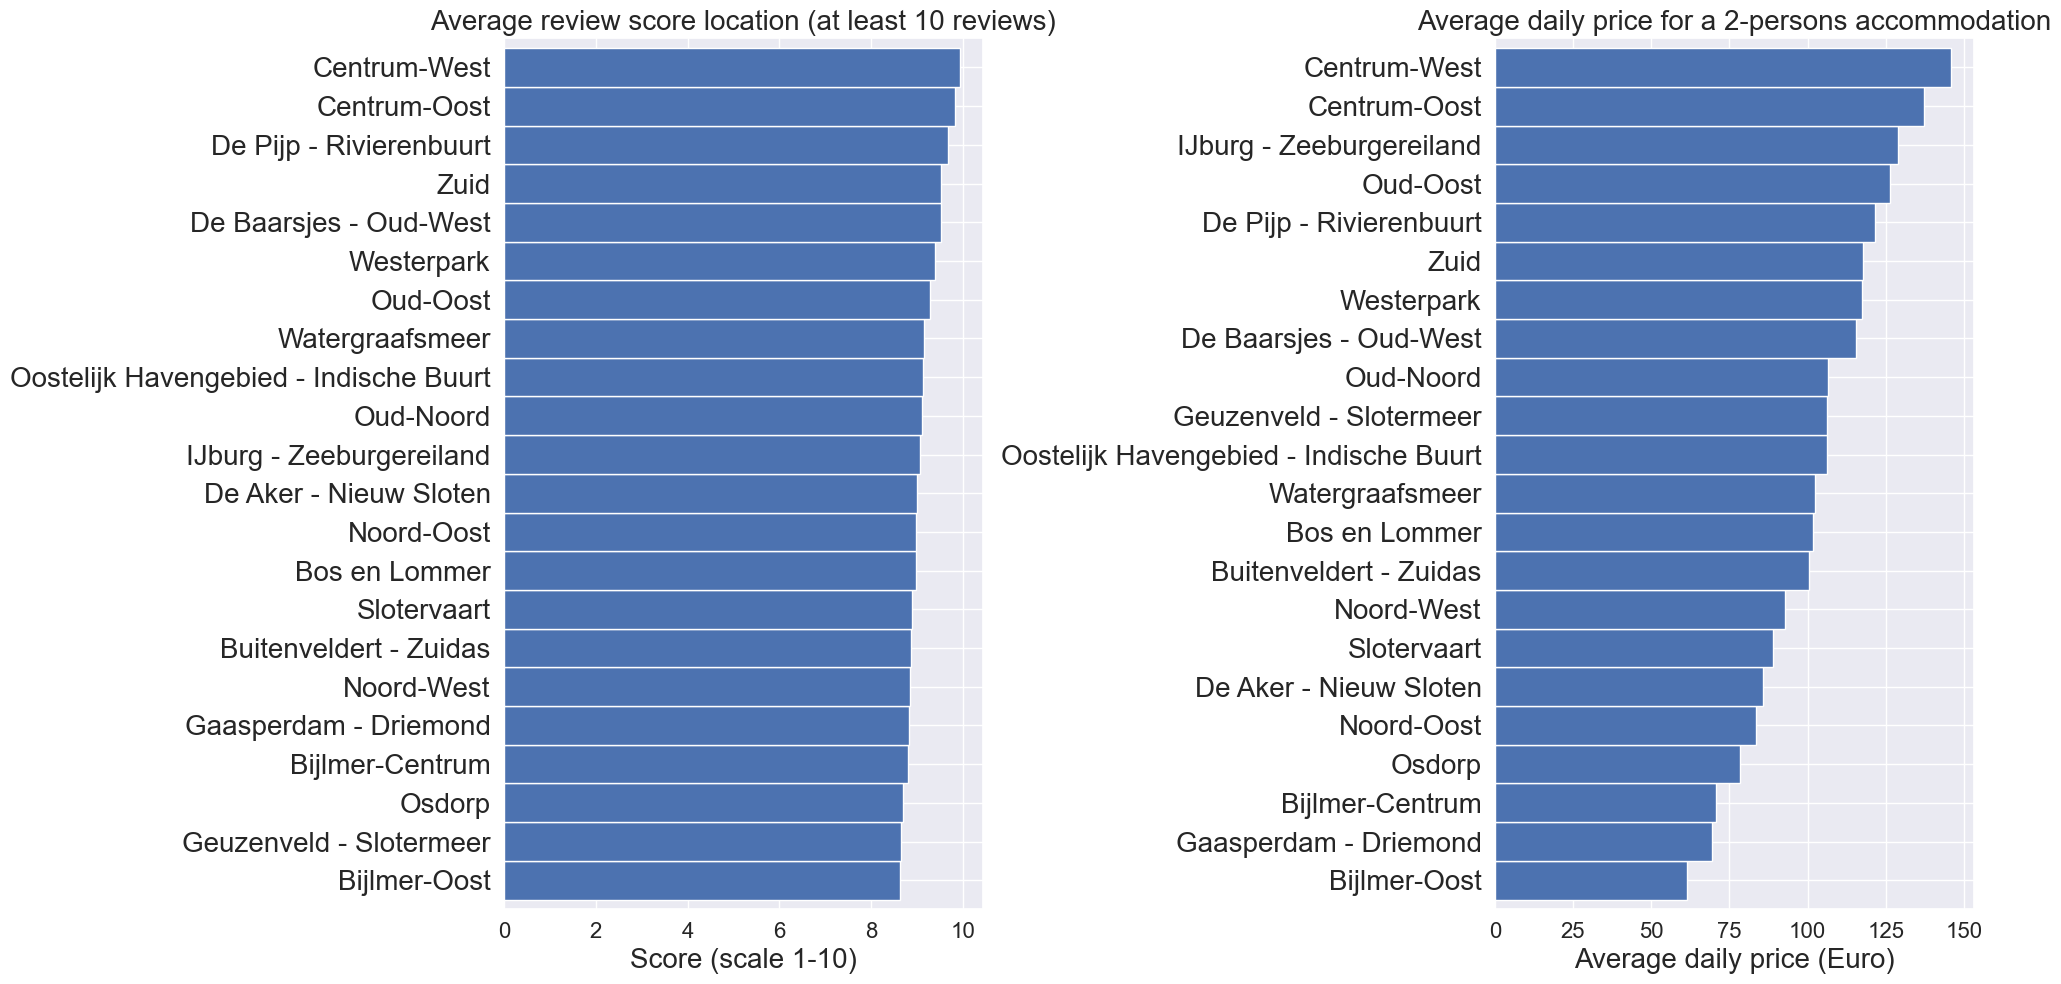

In [17]:
#Graphs to review the difference between scores and prices
fig = plt.figure(figsize=(20,10))
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=20)

ax1 = fig.add_subplot(121)
feq = listings[listings['number_of_reviews']>=10]
feq1 = feq.groupby('neighbourhood')['review_scores_location'].mean().sort_values(ascending=True)
ax1=feq1.plot.barh(color='b', width=1)
plt.title("Average review score location (at least 10 reviews)", fontsize=20)
plt.xlabel('Score (scale 1-10)', fontsize=20)
plt.ylabel("")

ax2 = fig.add_subplot(122)
feq = listings[listings['accommodates']==2]
feq2 = feq.groupby('neighbourhood')['price'].mean().sort_values(ascending=True)
ax2=feq2.plot.barh(color='b', width=1)
plt.title("Average daily price for a 2-persons accommodation", fontsize=20)
plt.xlabel('Average daily price (Euro)', fontsize=20)
plt.ylabel("")

plt.tight_layout()
plt.show()

## 2.8 Using Review Scores
In addition to writing reviews, visitors can also rate the venue overall and in each of several categories. Visitors may rate the following:

* Overall Experience. What was your general impression?
* Cleanliness. Did you think your room was neat and organized?
* Accuracy. How well did your listing page describe your location?
* Value. Did you think the price you charged for your listing was reasonable?
* Communication. How successfully did you and your host communicate both before and during their visit?
* Arrival. How easy was it for them to check in?
* Location. How did the neighborhood make you feel?

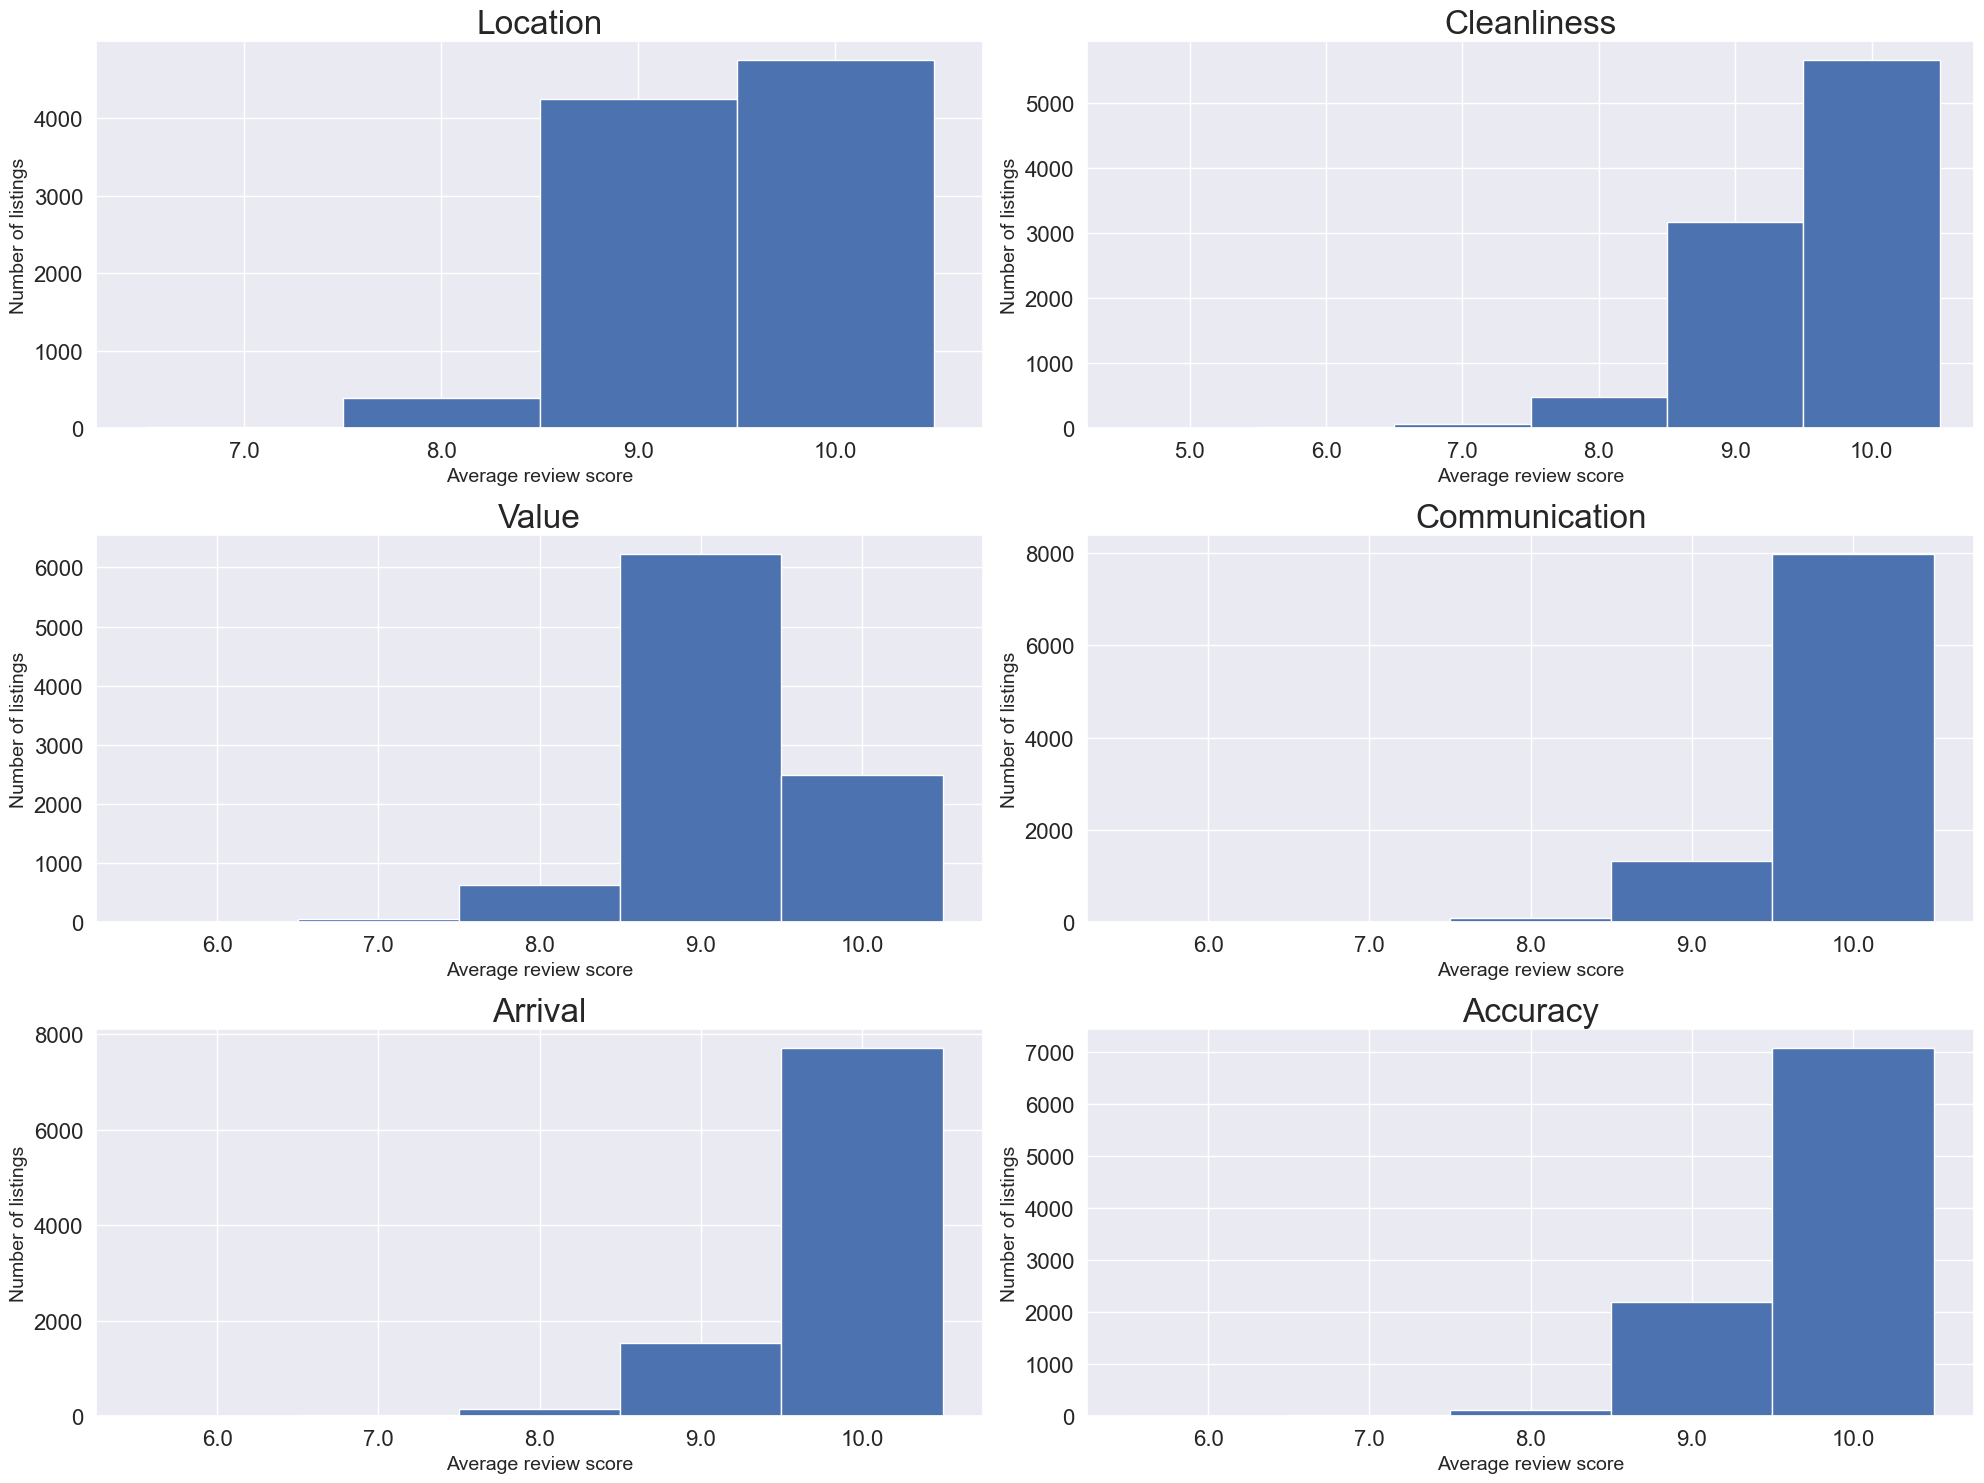

In [18]:
listings6 = listings[listings['number_of_reviews']>=10]

fig = plt.figure(figsize=(20,15))
plt.rc('xtick', labelsize=16) 
plt.rc('ytick', labelsize=16)

ax1 = fig.add_subplot(321)
feq_rs_1=listings6['review_scores_location'].value_counts().sort_index()
ax1=feq_rs_1.plot.bar(color='b', width=1, rot=0)
plt.title("Location", fontsize=24)
plt.ylabel('Number of listings', fontsize=14)
plt.xlabel('Average review score', fontsize=14)

ax2 = fig.add_subplot(322)
feq_rs_2=listings6['review_scores_cleanliness'].value_counts().sort_index()
ax2=feq_rs_2.plot.bar(color='b', width=1, rot=0)
plt.title("Cleanliness", fontsize=24)
plt.ylabel('Number of listings', fontsize=14)
plt.xlabel('Average review score', fontsize=14)

ax3 = fig.add_subplot(323)
feq_rs_3=listings6['review_scores_value'].value_counts().sort_index()
ax3=feq_rs_3.plot.bar(color='b', width=1, rot=0)
plt.title("Value", fontsize=24)
plt.ylabel('Number of listings', fontsize=14)
plt.xlabel('Average review score', fontsize=14)

ax4 = fig.add_subplot(324)
feq_rs_4=listings6['review_scores_communication'].value_counts().sort_index()
ax4=feq_rs_4.plot.bar(color='b', width=1, rot=0)
plt.title("Communication", fontsize=24)
plt.ylabel('Number of listings', fontsize=14)
plt.xlabel('Average review score', fontsize=14)

ax5 = fig.add_subplot(325)
feq_rs_5=listings6['review_scores_checkin'].value_counts().sort_index()
ax5=feq_rs_5.plot.bar(color='b', width=1, rot=0)
plt.title("Arrival", fontsize=24)
plt.ylabel('Number of listings', fontsize=14)
plt.xlabel('Average review score', fontsize=14)

ax6 = fig.add_subplot(326)
feq_rs_6=listings6['review_scores_accuracy'].value_counts().sort_index()
ax6=feq_rs_6.plot.bar(color='b', width=1, rot=0)
plt.title("Accuracy", fontsize=24)
plt.ylabel('Number of listings', fontsize=14)
plt.xlabel('Average review score', fontsize=14)

plt.tight_layout()
plt.show()

# 3. Conclusion

I would personally consider any score of 8 or lower to be not a decent score after seeing the score distributions. <br>
The "Value" seems to be the most useful score if I were to utilize any of these ratings to find lodging. <br>
I usually prefer to obtain good value for my money, first and foremost ;-). <br>
The indicator is a little more "distinguishable" than other indicators because there are only a small number of "10 averages."<br>
The most valuable aspect of this research was in illustrating the contrasts between our possibilities through an analytical lens, which may have provided some insight into how to make an apartment-hunting decision. It was also fun to use a data-driven approach to solve a problem that I had primarily relied on intuition to solve.